### Objective:

To perform Exploratory Data Analysis on certain attributes of the LendingClub dataset and get insights.

The attributes that we choose are:

    1.loan status
    2.purpose
    3.loan amount
    4.interest rate
    5.grade
    6.sub grade
    7.employee length
    8.term

### About the dataset:

This dataset has be obtained from Kaggle and is provided by the LendingClub. We have used a part of the dataset.

It contains 252971 rows and 53 columns. 

The target variable is loan_status (Charged off,Fully paid).


### Loading the libraries and reading the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option("max_rows",1000000)
pd.set_option("max_columns",100)

In [2]:
df = pd.read_csv('LoanPrediction.csv')

In [3]:
df.shape

(252971, 53)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,NaN,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [5]:
df = df.drop(['id','member_id','url','policy_code'],axis = 1) #dropping these colmns since they dont impact the target variable

In [6]:
cat_cols = df.select_dtypes(include='object').columns

In [7]:
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [8]:
num_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']

In [9]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,NaN,Sep-2015,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN


### Data Imputation


In [10]:
miss_val = df.isnull().sum()
miss_val[miss_val >0]

emp_title                      13931
emp_length                      9897
title                             13
revol_util                       199
last_pymnt_d                     527
next_pymnt_d                  252971
last_credit_pull_d                21
collections_12_mths_ex_med        56
tot_coll_amt                   63708
tot_cur_bal                    63708
total_rev_hi_lim               63708
dtype: int64

In [11]:
df = df.drop('next_pymnt_d',axis = 1) # since the whole column is missing

In [12]:
df.emp_title = df.emp_title.replace(np.NaN,'Manager') # imputing with mode

In [13]:
df.emp_length = df.emp_length.fillna('< 1 year') # the missing values may have 0 years of employment hence we fill it with
# < 1 year

In [14]:
df.title = df.title.replace(np.NaN,'Debt consolidation') # imputing with mode

In [15]:
df["revol_util"]= df["revol_util"].fillna(df["revol_util"].mean()) # imputing with mean

In [16]:
df.last_pymnt_d.fillna(df.last_pymnt_d.mode()[0],inplace=True) # imputing with mode

In [17]:
df.last_credit_pull_d.fillna(df.last_credit_pull_d.mode()[0],inplace = True) # imputing with mode (mode has 40% values 
# replacing 0.2 percent of missing values is fine)

In [18]:
df.collections_12_mths_ex_med.fillna(df.collections_12_mths_ex_med.median(),inplace = True) # imputing with median

In [19]:
df["tot_cur_bal"] = df["tot_cur_bal"].fillna(df["tot_cur_bal"].mean()) # imputing with mean (we have multiple ways to 
# imupte this eg. KNN, MICE,mean,replace with 0 whichever is best for the model)


In [20]:
df["tot_coll_amt"] = df["tot_coll_amt"].fillna(0) # imputing with 0 because we believe mojority of the borrowers
# never owed any amount.

In [21]:
df["total_rev_hi_lim"] = df["total_rev_hi_lim"].fillna(df["total_rev_hi_lim"].mean()) # imputing with mean


In [22]:
df['home_ownership']=df['home_ownership'].replace(['OTHER','NONE','ANY'],'MORTGAGE')## MODE IMPUTATION 

In [23]:
miss_val = df.isnull().sum()
miss_val[miss_val >0]

Series([], dtype: int64)

### Exploratory Data Analysis

In [24]:
df = df[['loan_amnt','purpose','int_rate','grade','sub_grade','emp_length','term','loan_status']] #preparing data for EDA

In [25]:
df.head()

,loan_amnt,purpose,int_rate,grade,sub_grade,emp_length,term,loan_status
0,5000.0,credit_card,10.65,B,B2,10+ years,36 months,Fully Paid
1,2500.0,car,15.27,C,C4,< 1 year,60 months,Charged Off
2,2400.0,small_business,15.96,C,C5,10+ years,36 months,Fully Paid
3,10000.0,other,13.49,C,C1,10+ years,36 months,Fully Paid
4,5000.0,wedding,7.90,A,A4,3 years,36 months,Fully Paid


##### Loan Status

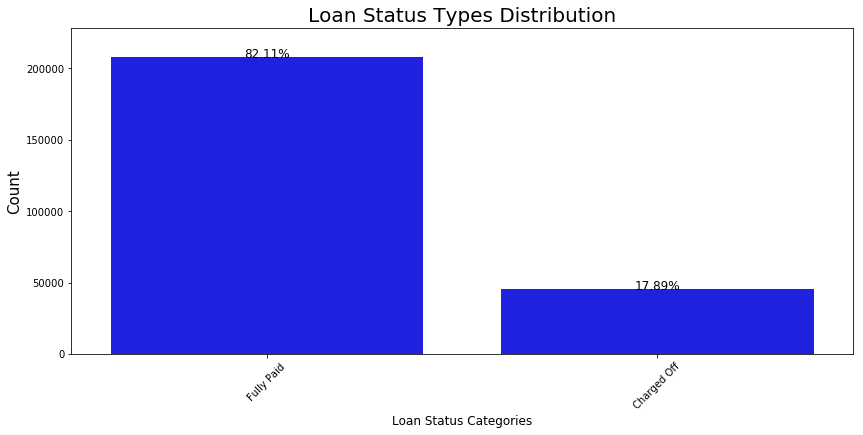

In [26]:
total = len(df)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=df, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show() 

We can see that there is an imbalanced in the distribution of the target variable.

##### Purpose

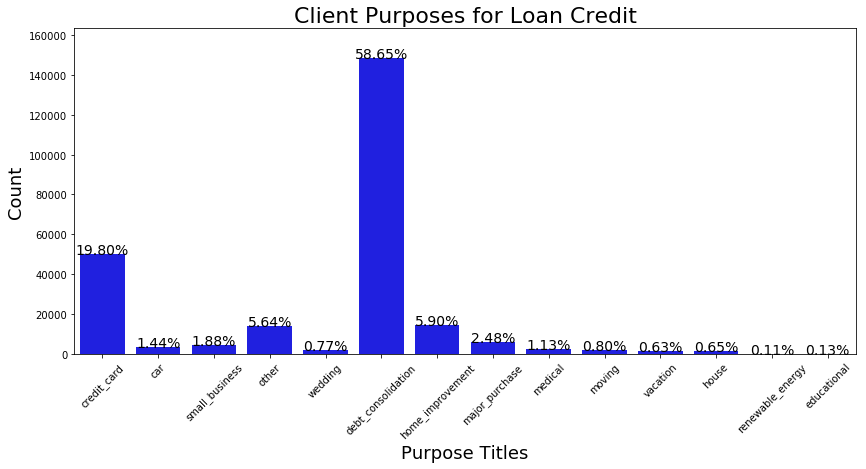

In [27]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=df, 
                  color='blue')
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

plt.show()

We can understand why the people are taking loans from this graph.

The top 3 purposes are:

    58.65% of the Loans are for Debt Consolidation
    
    19.80% are to pay Credit Card
    
    5.90% towards Home Improvement

##### Loan Amount and Interest Rate

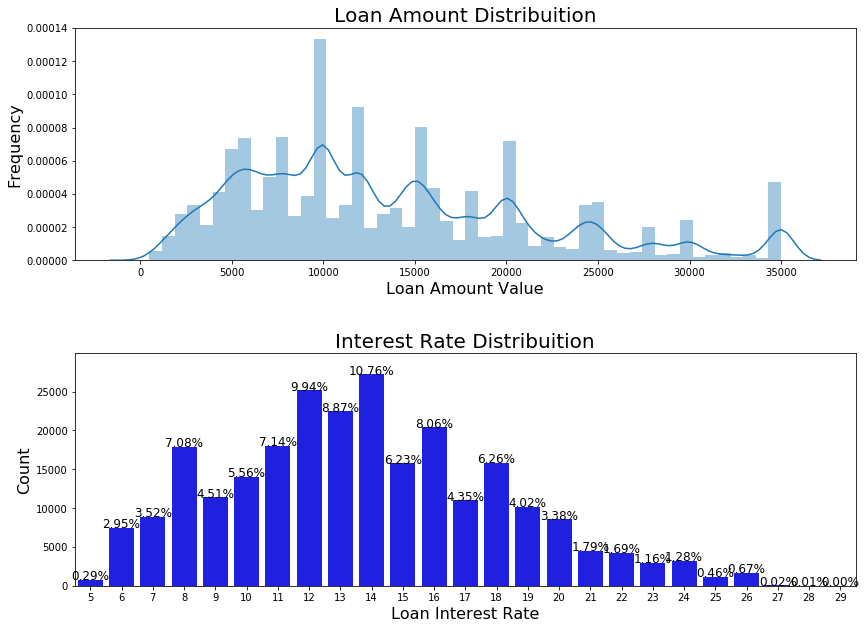

In [28]:
df['int_round'] = df['int_rate'].round(0).astype(int)

#I will start looking the loan_amnt column
plt.figure(figsize=(14,10))

# Loan Amt plot
plt.subplot(211)
g = sns.distplot(df["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)

## Interest plot
plt.subplot(212)
g1 = sns.countplot(x="int_round", data=df, 
                  color='blue')
g1.set_xlabel("Loan Interest Rate", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)
sizes=[] # Get highest values in y
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

We can note that many people obtain loans of $10,000.

Also, many part of all loans have interest rate between 8% and 14%.

In Interest Rate: 

The most common is 14%, followed by 12% and 13%.

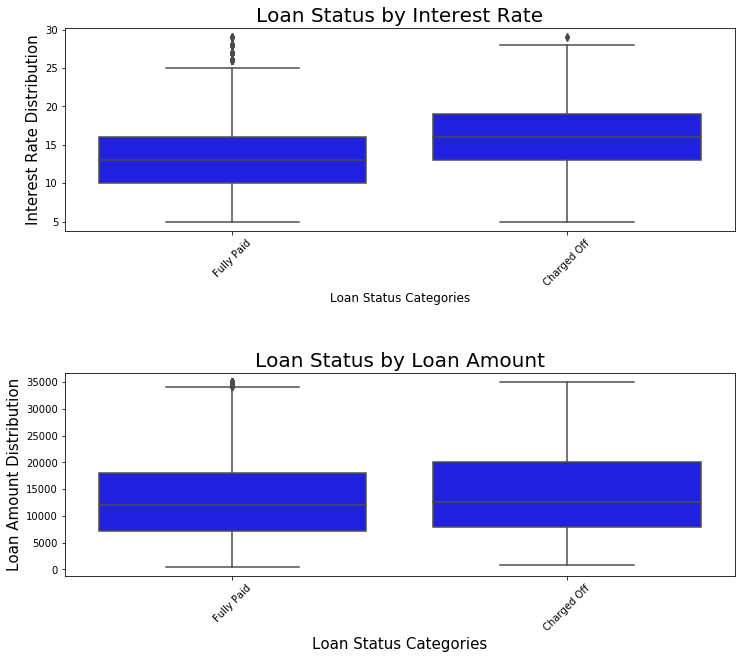

In [29]:
plt.figure(figsize = (12,16))


plt.subplot(311)
g1 = sns.boxplot(x="loan_status", y="int_round", data=df, 
                 color='blue')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Loan Status Categories", fontsize=12)
g1.set_ylabel("Interest Rate Distribution", fontsize=15)
g1.set_title("Loan Status by Interest Rate", fontsize=20)

plt.subplot(312)
g2 = sns.boxplot(x="loan_status", y="loan_amnt", data=df, 
                 color='blue')
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Loan Status Categories", fontsize=15)
g2.set_ylabel("Loan Amount Distribution", fontsize=15)
g2.set_title("Loan Status by Loan Amount", fontsize=20)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

The interest rate of charged off customers is little higher, where as the loan amount is the same.

##### Comparing Grade and Interest rate

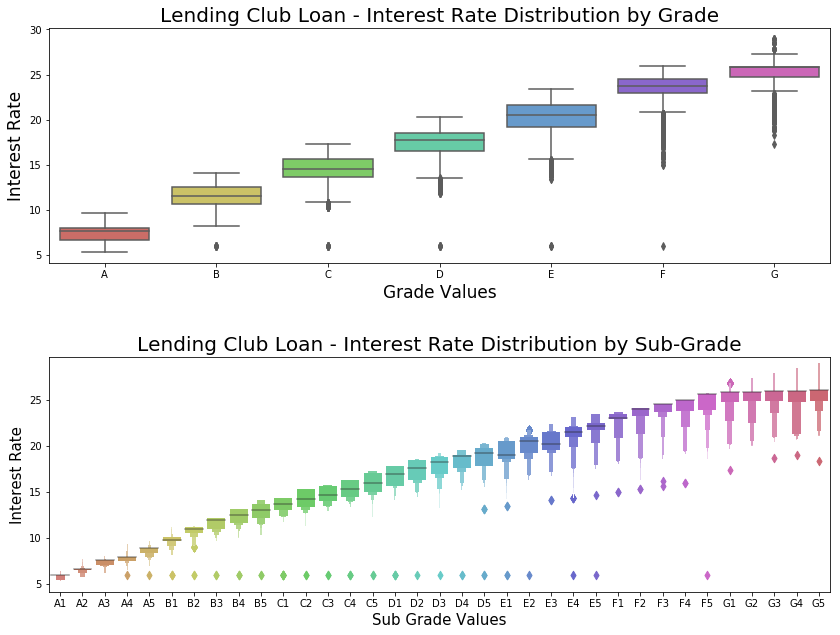

In [30]:
plt.figure(figsize=(14,16))
plt.subplot(312)
g1 = sns.boxplot(x='grade', y="int_rate",data=df, 
               palette = "hls",  
               order=["A",'B','C','D','E','F', 'G'])
g1.set_xlabel("Grade Values", fontsize=17)
g1.set_ylabel("Interest Rate", fontsize=17)
g1.set_title("Lending Club Loan - Interest Rate Distribution by Grade", fontsize=20)


order_sub = df.groupby("sub_grade")['int_rate'].count().index

plt.subplot(313)
g2 = sns.boxenplot(x="sub_grade", y="int_rate", data=df, 
                   palette="hls",order=order_sub)
g2.set_xlabel("Sub Grade Values", fontsize=15)
g2.set_ylabel("Interest Rate", fontsize=15)
g2.set_title("Lending Club Loan - Interest Rate Distribution by Sub-Grade", fontsize=20)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

We can see that as grade  increases the Interest Rate increases as well.

Same holds good for Sub grade.

This shows that your interest rate depends on your Grade and sub grade.

##### Emp_length 

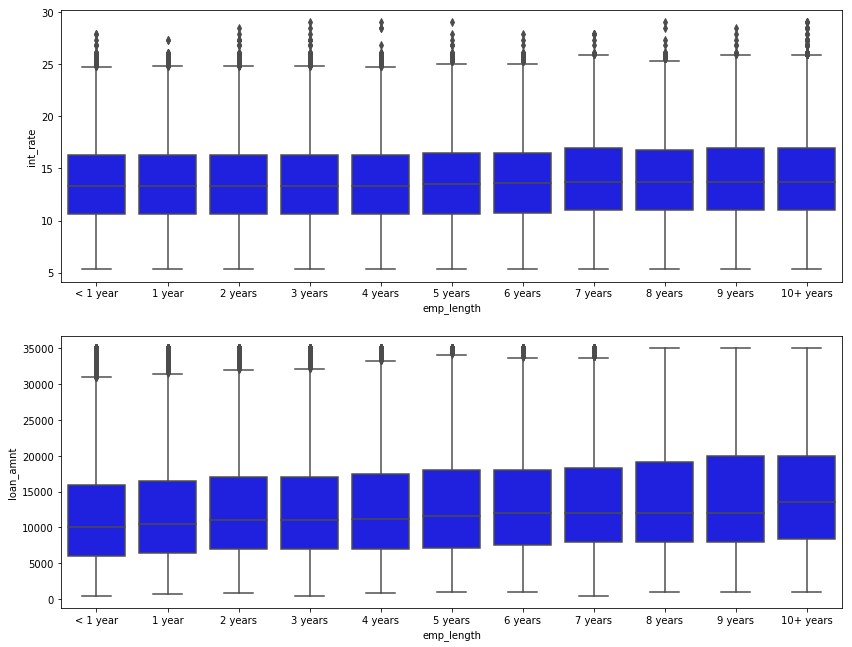

In [31]:
emp_ord = ['< 1 year', '1 year', '2 years', '3 years',
           '4 years', '5 years', '6 years', '7 years',
           '8 years', '9 years', '10+ years']

fig, ax = plt.subplots(2,1, figsize=(14,11))
g = sns.boxplot(x="emp_length", y="int_rate", data=df,
                ax=ax[0], color='blue',
                order=emp_ord)

z = sns.boxplot(x="emp_length", y="loan_amnt",data=df, 
                   ax=ax[1], color='blue',
                   order=emp_ord)

plt.show()

 We can see that the employment duration do not influence the interest rate but it have a slight difference considering the loan_amount patterns.

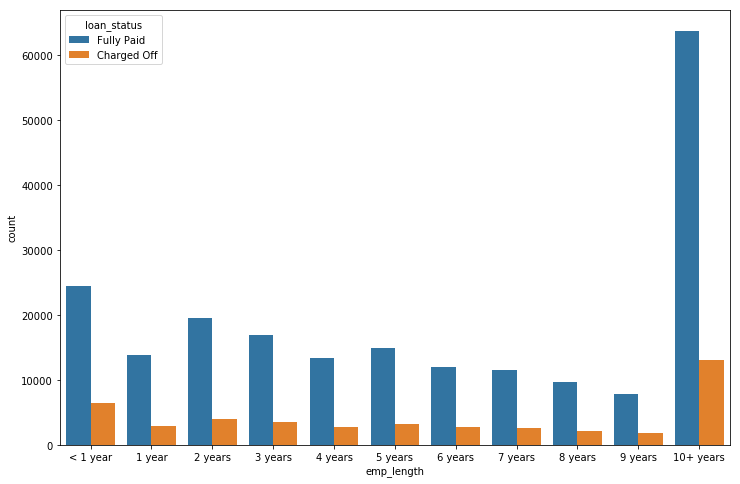

In [37]:
plt.figure(figsize= (12,8))
sns.countplot(df.emp_length,hue = df.loan_status,order = emp_ord)
plt.show()

People who have been employed for more than 10 years seek the maximum number of loans and the have the most number of Fully paid and charged off customers.

##### Term

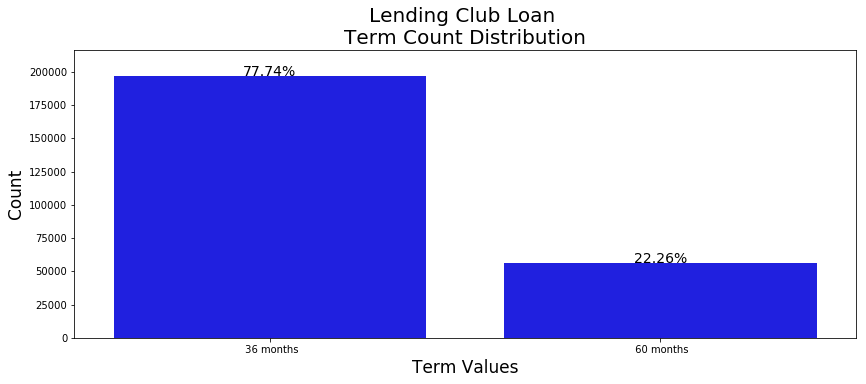

In [32]:
order_sub = df.groupby("sub_grade")['int_rate'].count().index

plt.figure(figsize=(14,18))


plt.subplot(311)
g = sns.countplot(x="term", data=df,color='blue')
g.set_xlabel("Term Values", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_title("Lending Club Loan \nTerm Count Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()

We can see that people prefer 36 month term over 60 month term.

### Conclusions:

We found various insights upon performing Explorartory data analysis.

The major insights are:
    
    1.The loan status is imbalanced, since it is the target variable we cant afford it to imbalanced.
    2.Debt consolidation was the main purpose for taking a loan from the lendingclub for over 50% of the people.
    3.A high number of people took loans for 10,000 dollars.
    4.Close to 35% of people had interest rates between 12% to 14%.
    5.Interest rate depends on the persons grade and sub grade.
    6.Charged off people had higher interest rates compared to Fully Paid people.
    7.Employee duration doesnt affect the interest rate or loan amount.
    8.Customers with more 10 years of employee length seek loans the most.
    
If the LendingClub wants to reduce the number of charged off customers then they have to do the following:

    1. Reduce the interest rates.
    2. Reduce the amount of loans given to customers with 10+ years of experience.

This advice is based on basic EDA perfmored.